### Selecting the miost appropriate Time Series Model.

* We start with the most simple models and gradually move to more complex models.

* As we try more complex models with more number of predictors, the coeefficients on the new predictors in the complex model should be significantly different from zero. Only then we benefit from moving to the more complex model. If the coefficients for the new predictors are close to zero, it implies that these predictors do not have good predictive power, and we should probably move back to the simpler model.

* We prefer simpler models, unless the more complex model makes significantly better predictions. To test if the predictions are significantly better we have the Log-Likelihood Ratio(LLR) test (used for models with different degrees of freedom).

* For comparing models with the same number of required lags we can't use LLR, so we compare the information criteria for each one. Lower the coefficients, less is the data required to make accurate predictions. Lower AIC,BIC preferable. 

* If our model fits well, there should be no trend that we have failed to account for and hence our residuals should resemble white noise. This ensure that there is no other trend left unaccounted for and we cant make our model better without overfitting it.

### Auto Regressive(AR) Model

A linear model where current period values are a sum of past outcomes multiplied by a numeric factor.

An AR(1) model only uses the value of the immediately preceding period as the predictor.

$x_{t} = C + \phi x_{t-1} + \epsilon_{t},  |\phi| <= 1$

If $|\phi| > 1$, then at some point the series will blow up.

Question arises - How many lagged predictors should we use? We start with a simple model and gradually increase the number of predictors and see what happens to the coefficients. If the coefficients are not significantly different from zero, then the ew predictors are not useful. We also check if the more complicated model is doing a better job at predicting?

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

In [19]:
raw_csv_data = pd.read_csv("data/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, format = "%d/%m/%Y")
df_comp.set_index("date",inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp.ftse
del df_comp['spx'],df_comp['dax'],df_comp['ftse'],df_comp['nikkei']
size = int(len(df_comp) * 0.8)
df,df_test = df_comp.iloc[:size],df_comp.iloc[size:]

### ACF

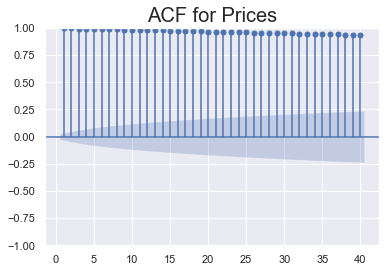

In [20]:
sgt.plot_acf(df.market_value,zero = False,lags = 40)
plt.title('ACF for Prices',size=20)
plt.show()

### PACF

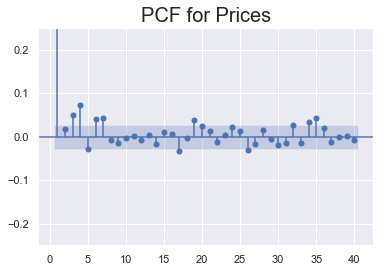

In [21]:
sgt.plot_pacf(df.market_value,zero = False,lags = 40,alpha = 0.05,method = ('ols'))
plt.title('PCF for Prices',size=20)
plt.ylim(-0.25,0.25)
plt.show()

We observe that the values for the later lags are quite insignificant, so we can ignore them.

### The AR(1) model

In [30]:
model_ar = ARIMA(df.market_value,order = (1,0,0))
results_ar = model_ar.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27622.604
Date:                Sat, 20 Nov 2021   AIC                          55251.207
Time:                        16:37:29   BIC                          55270.772
Sample:                    01-07-1994   HQIC                         55258.063
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6374    423.329     12.023      0.000    4259.929    5919.346
ar.L1          0.9984      0.001   1147.578      0.000       0.997       1.000
sigma2      3511.3842     40.874     85.907      0.000    3431.272    3591.496
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):              3313.33
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### Interpreting Results 

* Coef is the coefficients that the model estimates. First is C and the second is $\phi1$.
* Both the estimates have high t-stats and low p values, indicating that the numvers are significantly different from 0.
* It also provides the estiamted distribution of C and $\phi1$. Note that both the distributions do not include 0 - another indication that the estimates are siginificantly non-zero.

### Higher Lag AR Models

In [46]:
model_ar_2 = ARIMA(df.market_value,order = (2,0,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27621.949
Date:                Sat, 20 Nov 2021   AIC                          55251.898
Time:                        17:30:27   BIC                          55277.984
Sample:                    01-07-1994   HQIC                         55261.039
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    368.251     13.821      0.000    4367.881    5811.400
ar.L1          0.9811      0.010     99.868      0.000       0.962       1.000
ar.L2          0.0171      0.010      1.749      0.080      -0.002       0.036
sigma2      3510.1277     41.037     85.535      0.000    3429.696    3590.560
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3282.81
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In the AR(2) model above, note that the p value is higher for the L2 value, indicating that the value is not significantly different from 0.
The distribution also contains 0.

In [41]:
model_ar_3 = ARIMA(df.market_value,order = (3,0,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27615.962
Date:                Sat, 20 Nov 2021   AIC                          55241.925
Time:                        16:45:52   BIC                          55274.532
Sample:                    01-07-1994   HQIC                         55253.351
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    378.583     13.444      0.000    4347.631    5831.651
ar.L1          0.9802      0.010     99.076      0.000       0.961       1.000
ar.L2         -0.0309      0.013     -2.315      0.021      -0.057      -0.005
ar.L3          0.0489      0.009      5.383      0.000       0.031       0.067
sigma2      3502.2643     41.020     85.379      0.000    3421.866    3582.662
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              3286.97
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
model_ar_4 = ARIMA(df.market_value,order = (4,0,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Sat, 20 Nov 2021   AIC                          55217.359
Time:                        16:48:20   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.959     12.985      0.000    4321.415    5857.867
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.033      -0.055      -0.002
ar.L3         -0.0224      0.013     -1.784      0.074      -0.047       0.002
ar.L4          0.0728      0.009      8.033      0.000       0.055       0.091
sigma2      3484.0262     41.922     83.108      0.000    3401.861    3566.191
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3044.18
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### LLR Test

The Log Likelihood ratio test is to check if the log likelihood of the more complex function is significantly better than the log likelihood of the simpler function
It returns tht p value of the difference.


In [49]:
def LLR_test(mod_1,mod_2,DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = 2 * (L2 - L1)
    p=chi2.sf(LR,DF).round(3)
    return p

In [55]:
LLR_test(model_ar_2,model_ar_3)

0.001

In [56]:
LLR_test(model_ar_2,model_ar_4)

0.0

##### We should keep trying more complex models until both these considiotns are satisfied.

* High p value returned from LLR test, indicating that the model is not significantly better.
* High p value for the co-efficient of the last lag term, indicating that the coefficient is not significantly different from zero, and hence the variable has no explanatory power.
